In [34]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/train.csv


In [35]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
train_data.head()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [36]:
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [37]:
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)



% of women who survived: 0.7420382165605095


In [38]:
men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

% of men who survived: 0.18890814558058924


In [39]:
from sklearn.ensemble import RandomForestClassifier

y = train_data["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
print(output)
#output.to_csv('my_submission.csv', index=False)
#print("Your submission was successfully saved!")


     PassengerId  Survived
0            892         0
1            893         1
2            894         0
3            895         0
4            896         1
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]


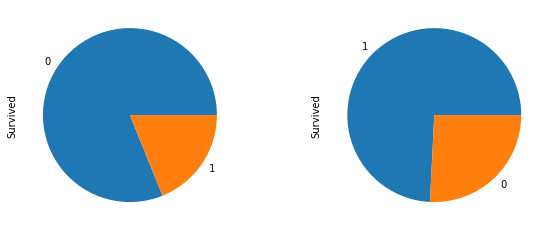

In [40]:
fig = plt.figure(figsize=(10,4))
fig.add_subplot(121)
train_data.Survived[train_data['Sex'] == 'male'].value_counts().plot(kind='pie')
fig.add_subplot(122)
train_data.Survived[train_data['Sex'] == 'female'].value_counts().plot(kind='pie')

In [41]:
train_data['Sex'] = LabelEncoder().fit_transform(train_data['Sex'])

In [42]:
train_data['Name'] = train_data['Name'].map(lambda x: x.split(',')[1].split('.')[0].strip())
titles = train_data['Name'].unique()
titles

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [46]:
train_data['Age'].fillna(-1, inplace=True)

medians = dict()
for title in titles:
    median = train_data.Age[(train_data["Age"] != -1) & (train_data['Name'] == title)].median()
    medians[title] = median
    
for index, row in train_data.iterrows():
    if row['Age'] == -1:
        train_data.loc[index, 'Age'] = medians[row['Name']]

train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Mr,1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Mrs,0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Miss,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Mrs,0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,Mr,1,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
i=1
for title in train_data['Name'].unique():
    fig.add_subplot(3, 6, i)
    plt.title('Title : {}'.format(title))
    train_data.Survived[train_data['Name'] == title].value_counts().plot(kind='pie')
    i += 1